In [44]:
import os
import sys
import scipy.io
import scipy.misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
from nst_utils import *
import tensorflow as tf

%matplotlib inline

In [45]:
print(tf.__version__)

1.12.0


C:\Users\nitis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


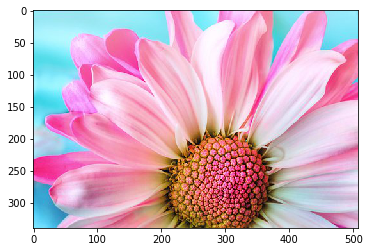

In [46]:
content_image = scipy.misc.imread("content/pink_flower.jpg")
imshow(content_image)

In [47]:
content_image.shape

(340, 508, 3)

In [48]:
# GRADED FUNCTION: compute_content_cost

def compute_content_cost(a_C, a_G):
    """
    Computes the content cost
    
    Arguments:
    a_C -- tensor of dimension (1, n_H, n_W, n_C), hidden layer activations representing content of the image C 
    a_G -- tensor of dimension (1, n_H, n_W, n_C), hidden layer activations representing content of the image G
    
    Returns: 
    J_content -- scalar that you compute using equation 1 above.
    """
    
    ### START CODE HERE ###
    # Retrieve dimensions from a_G (≈1 line)
    m, n_H, n_W, n_C = a_G.get_shape().as_list()
    
    # Reshape a_C and a_G (≈2 lines)
    a_C_unrolled = tf.reshape(tf.transpose(a_C), [n_C,-1])
    a_G_unrolled = tf.reshape(tf.transpose(a_G), [n_C, -1])
    
    # compute the cost with tensorflow (≈1 line)
    J_content = (1/(4*n_H*n_W*n_C))*tf.reduce_sum(tf.square(tf.subtract(a_C, a_G)))
    ### END CODE HERE ###
    
    return J_content

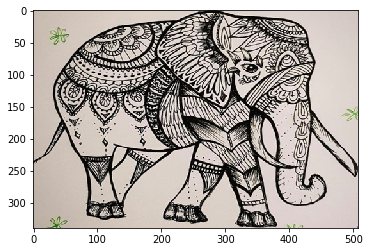

In [49]:
im1 = Image.open("raw-images/IMG_1632.jpg")
width=508
height=340
style_image = im1.resize((width, height), Image.ANTIALIAS)
style_image.save("style_transfer/images/elephant_scaled.jpg",quality=95)
imshow(style_image)

In [61]:
# GRADED FUNCTION: compute_layer_style_cost

def compute_layer_style_cost(a_S, a_G):
    """
    Arguments:
    a_S -- tensor of dimension (1, n_H, n_W, n_C), hidden layer activations representing style of the image S 
    a_G -- tensor of dimension (1, n_H, n_W, n_C), hidden layer activations representing style of the image G
    
    Returns: 
    J_style_layer -- tensor representing a scalar value, style cost defined above by equation (2)
    """
    
    ### START CODE HERE ###
    # Retrieve dimensions from a_G (≈1 line)
    m, n_H, n_W, n_C = a_G.get_shape().as_list()
    
    # Reshape the images to have them of shape (n_C, n_H*n_W) (≈2 lines)
    a_S = tf.reshape(tf.transpose(a_S), [n_C,-1])
    a_G = tf.reshape(tf.transpose(a_G), [n_C,-1])

    # Computing gram_matrices for both images S and G (≈2 lines)
    GS = tf.matmul(a_S, tf.transpose(a_S))
    GG = tf.matmul(a_G, tf.transpose(a_G))

    # Computing the loss (≈1 line)
    J_style_layer = (1/(4*n_C**2*(n_H*n_W)**2))*tf.reduce_sum(tf.square(tf.subtract(GS, GG)))
    
    ### END CODE HERE ###
    
    return J_style_layer

In [50]:

def compute_style_cost(model, STYLE_LAYERS):
    """
    Computes the overall style cost from several chosen layers
    
    Arguments:
    model -- our tensorflow model
    STYLE_LAYERS -- A python list containing:
                        - the names of the layers we would like to extract style from
                        - a coefficient for each of them
    
    Returns: 
    J_style -- tensor representing a scalar value, style cost defined above by equation (2)
    """
    
    # initialize the overall style cost
    J_style = 0

    for layer_name, coeff in STYLE_LAYERS:

        # Select the output tensor of the currently selected layer
        out = model[layer_name]

        # Set a_S to be the hidden layer activation from the layer we have selected, by running the session on out
        a_S = sess.run(out)

        # Set a_G to be the hidden layer activation from same layer. Here, a_G references model[layer_name] 
        # and isn't evaluated yet. Later in the code, we'll assign the image G as the model input, so that
        # when we run the session, this will be the activations drawn from the appropriate layer, with G as input.
        a_G = out
        
        # Compute style_cost for the current layer
        J_style_layer = compute_layer_style_cost(a_S, a_G)

        # Add coeff * J_style_layer of this layer to overall style cost
        J_style += coeff * J_style_layer

    return J_style

In [51]:
STYLE_LAYERS = [
    ('conv1_1', 0.2),
    ('conv2_1', 0.2),
    ('conv3_1', 0.2),
    ('conv4_1', 0.2),
    ('conv5_1', 0.2)]

In [52]:
# GRADED FUNCTION: total_cost

def total_cost(J_content, J_style, alpha = 10, beta = 40):
    """
    Computes the total cost function
    
    Arguments:
    J_content -- content cost coded above
    J_style -- style cost coded above
    alpha -- hyperparameter weighting the importance of the content cost
    beta -- hyperparameter weighting the importance of the style cost
    
    Returns:
    J -- total cost as defined by the formula above.
    """
    
    ### START CODE HERE ### (≈1 line)
    J = alpha*J_content + beta*J_style
    ### END CODE HERE ###
    
    return J

In [53]:
# Reset the graph
tf.reset_default_graph()

# Start interactive session
sess = tf.InteractiveSession()

C:\Users\nitis\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [54]:
content_image = scipy.misc.imread("content/pink_flower.jpg")
content_image = reshape_and_normalize_image(content_image)

C:\Users\nitis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [55]:
style_image = scipy.misc.imread("style_transfer/images/elephant_scaled.jpg")
style_image = reshape_and_normalize_image(style_image)

C:\Users\nitis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


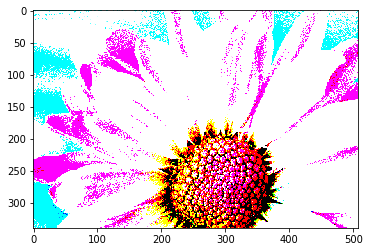

In [56]:
generated_image = generate_noise_image(content_image)
imshow(generated_image[0])

In [57]:
style_image.shape

(1, 340, 508, 3)

In [58]:
model = load_vgg_model("../imagenet-vgg-verydeep-19.mat")
print(model)

{'input': <tf.Variable 'Variable:0' shape=(1, 340, 508, 3) dtype=float32_ref>, 'conv1_1': <tf.Tensor 'Relu:0' shape=(1, 340, 508, 64) dtype=float32>, 'conv1_2': <tf.Tensor 'Relu_1:0' shape=(1, 340, 508, 64) dtype=float32>, 'avgpool1': <tf.Tensor 'AvgPool:0' shape=(1, 170, 254, 64) dtype=float32>, 'conv2_1': <tf.Tensor 'Relu_2:0' shape=(1, 170, 254, 128) dtype=float32>, 'conv2_2': <tf.Tensor 'Relu_3:0' shape=(1, 170, 254, 128) dtype=float32>, 'avgpool2': <tf.Tensor 'AvgPool_1:0' shape=(1, 85, 127, 128) dtype=float32>, 'conv3_1': <tf.Tensor 'Relu_4:0' shape=(1, 85, 127, 256) dtype=float32>, 'conv3_2': <tf.Tensor 'Relu_5:0' shape=(1, 85, 127, 256) dtype=float32>, 'conv3_3': <tf.Tensor 'Relu_6:0' shape=(1, 85, 127, 256) dtype=float32>, 'conv3_4': <tf.Tensor 'Relu_7:0' shape=(1, 85, 127, 256) dtype=float32>, 'avgpool3': <tf.Tensor 'AvgPool_2:0' shape=(1, 43, 64, 256) dtype=float32>, 'conv4_1': <tf.Tensor 'Relu_8:0' shape=(1, 43, 64, 512) dtype=float32>, 'conv4_2': <tf.Tensor 'Relu_9:0' shap

In [59]:
# Assign the content image to be the input of the VGG model.  
sess.run(model['input'].assign(content_image))

# Select the output tensor of layer conv4_2
out = model['conv4_2']

# Set a_C to be the hidden layer activation from the layer we have selected
a_C = sess.run(out)

# Set a_G to be the hidden layer activation from same layer. Here, a_G references model['conv4_2'] 
# and isn't evaluated yet. Later in the code, we'll assign the image G as the model input, so that
# when we run the session, this will be the activations drawn from the appropriate layer, with G as input.
a_G = out

# Compute the content cost
J_content = compute_content_cost(a_C, a_G)

In [62]:
# Assign the input of the model to be the "style" image 
sess.run(model['input'].assign(style_image))

# Compute the style cost
J_style = compute_style_cost(model, STYLE_LAYERS)

In [63]:
### START CODE HERE ### (1 line)
J = total_cost(J_content, J_style)
### END CODE HERE ###

In [64]:
# define optimizer (1 line)
optimizer = tf.train.AdamOptimizer(2.0)

# define train_step (1 line)
train_step = optimizer.minimize(J)

In [68]:
def model_nn(sess, input_image, num_iterations = 200):
    
    # Initialize global variables (you need to run the session on the initializer)
    ### START CODE HERE ### (1 line)
    sess.run(tf.global_variables_initializer())
    ### END CODE HERE ###
    
    # Run the noisy input image (initial generated image) through the model. Use assign().
    ### START CODE HERE ### (1 line)
    sess.run(model['input'].assign(input_image))
    ### END CODE HERE ###
    
    for i in range(num_iterations):
    
        # Run the session on the train_step to minimize the total cost
        ### START CODE HERE ### (1 line)
        sess.run(train_step)
        ### END CODE HERE ###
        
        # Compute the generated image by running the session on the current model['input']
        ### START CODE HERE ### (1 line)
        generated_image = sess.run(model['input'])
        ### END CODE HERE ###

        # Print every 20 iteration.
        if i%20 == 0:
            Jt, Jc, Js = sess.run([J, J_content, J_style])
            print("Iteration " + str(i) + " :")
            print("total cost = " + str(Jt))
            print("content cost = " + str(Jc))
            print("style cost = " + str(Js))
            
            # save current generated image in the "/output" directory
            save_image("output/" + str(i) + ".png", generated_image)
    
    # save last generated image
    save_image('output/generated_image_nini.jpg', generated_image)
    
    return generated_image

In [69]:
model_nn(sess, generated_image)

Iteration 0 :
total cost = 9720596000.0
content cost = 15549.766
style cost = 243011020.0
Iteration 20 :
total cost = 4079782700.0
content cost = 21777.184
style cost = 101989120.0
Iteration 40 :
total cost = 2087472000.0
content cost = 25011.793
style cost = 52180548.0
Iteration 60 :
total cost = 991107900.0
content cost = 27165.326
style cost = 24770906.0
Iteration 80 :
total cost = 541777540.0
content cost = 28349.059
style cost = 13537350.0
Iteration 100 :
total cost = 391868670.0
content cost = 28823.355
style cost = 9789511.0
Iteration 120 :
total cost = 319879040.0
content cost = 29048.582
style cost = 7989714.0
Iteration 140 :
total cost = 271807260.0
content cost = 29253.258
style cost = 6787868.0
Iteration 160 :
total cost = 235587120.0
content cost = 29447.424
style cost = 5882316.0
Iteration 180 :
total cost = 206584290.0
content cost = 29637.543
style cost = 5157198.0


array([[[[ -74.862656 ,  -13.025689 ,   28.974512 ],
         [ -57.733974 ,  -35.51376  ,   11.807549 ],
         [ -81.05824  ,  -46.496826 ,   -2.1482797],
         ...,
         [ -53.2584   ,  -18.711868 ,  -10.969479 ],
         [ -68.69004  ,   -9.481724 ,   19.354446 ],
         [ -68.34286  ,  -14.432163 ,   -3.7558956]],

        [[ -21.2952   ,   12.315786 ,   61.375988 ],
         [ -34.094017 ,   32.224743 ,   89.449356 ],
         [ -27.302029 ,   37.888546 ,  120.531425 ],
         ...,
         [ -47.81349  ,  -26.831863 ,   -8.510802 ],
         [ -37.35089  ,   -0.5154333,    5.920137 ],
         [ -55.508858 ,   -1.2856964,   -6.221672 ]],

        [[  16.796518 ,   71.74283  ,  118.98539  ],
         [  74.890045 ,   68.22524  ,   98.74229  ],
         [  90.74087  ,   80.84718  ,  105.94409  ],
         ...,
         [ -22.76659  ,  -53.172108 ,   22.907616 ],
         [  -5.405261 ,  -19.293987 ,   -5.772383 ],
         [ -53.51866  ,  -13.431869 ,  -11.672791 ]],